In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import groupby

observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")
merged_df = observations.merge(species_info, on="scientific_name")

In [75]:
print(f"Columns of Observations: {observations.columns}")
print(f"Columns of Species Info: {species_info.columns}")

print(observations.head())
print(species_info.head())

Columns of Observations: Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Columns of Species Info: Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                       

In [76]:
print(observations.isna().sum())
merged_df["conservation_status"] = merged_df["conservation_status"].fillna("Excluded Statuses")

print(species_info.isna().sum())
print(species_info.conservation_status.unique())
print(observations["park_name"].unique())

scientific_name    0
park_name          0
observations       0
dtype: int64
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


                              park_name           category  count
0                   Bryce National Park          Amphibian     82
1                   Bryce National Park               Bird    591
2                   Bryce National Park               Fish    131
3                   Bryce National Park             Mammal    300
4                   Bryce National Park  Nonvascular Plant    333
5                   Bryce National Park            Reptile     81
6                   Bryce National Park     Vascular Plant   4890
7   Great Smoky Mountains National Park          Amphibian     82
8   Great Smoky Mountains National Park               Bird    591
9   Great Smoky Mountains National Park               Fish    131
10  Great Smoky Mountains National Park             Mammal    300
11  Great Smoky Mountains National Park  Nonvascular Plant    333
12  Great Smoky Mountains National Park            Reptile     81
13  Great Smoky Mountains National Park     Vascular Plant   4890
14        

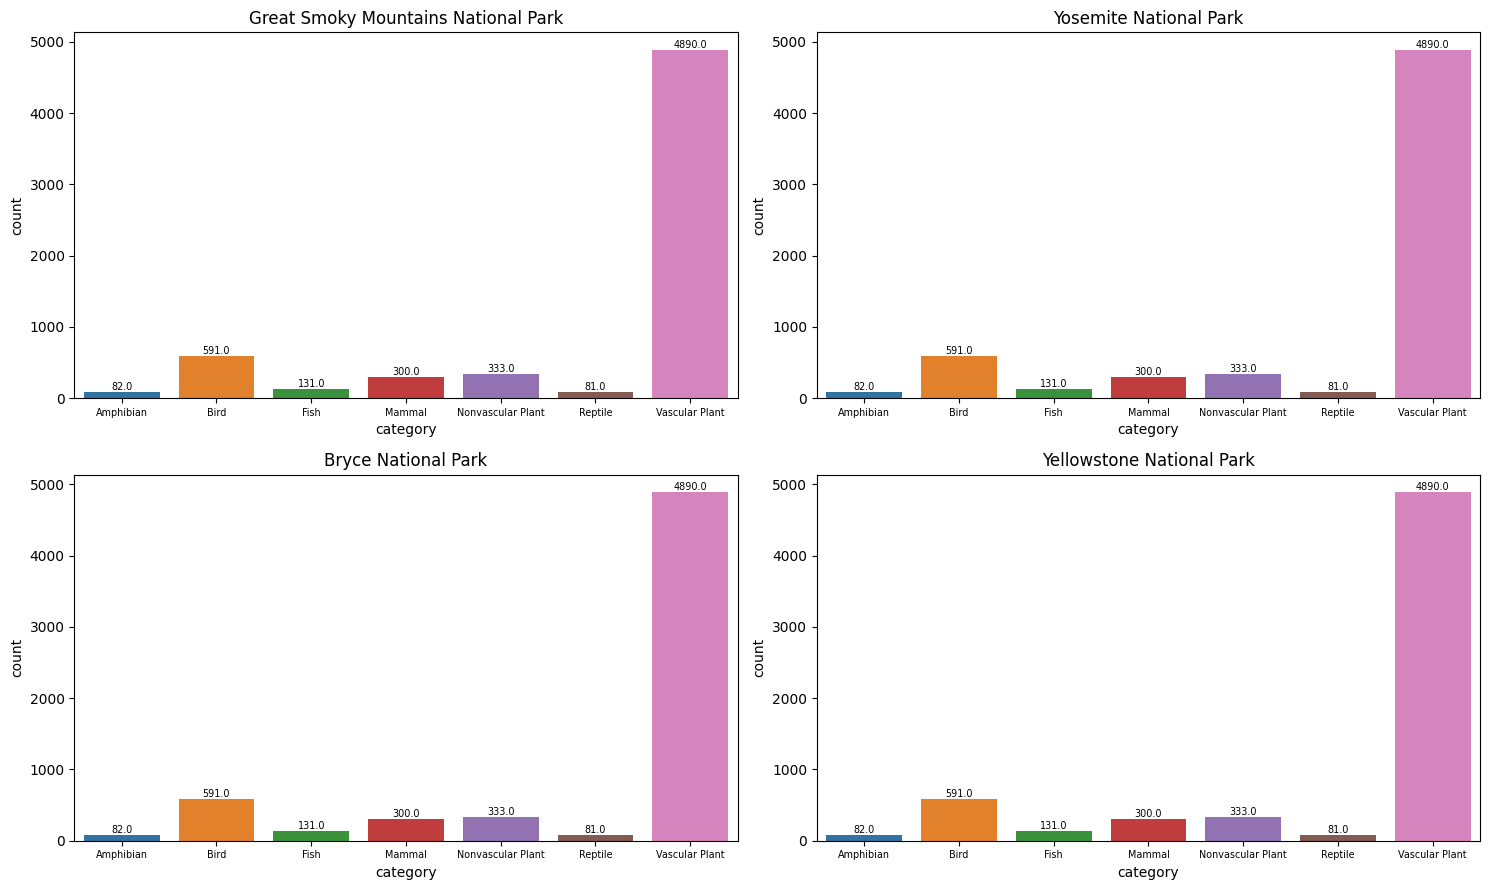

<Figure size 640x480 with 0 Axes>

In [77]:
park_names = ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']
grouped_data = merged_df.groupby(["park_name", "category"]).size().reset_index(name="count")
print(grouped_data.head(20))
plt.figure(figsize=(15, 9))

for i, park_name in enumerate(park_names, 1):

    plt.subplot(2, 2, i)
    
    sns.barplot(x="category", y="count", data=grouped_data[grouped_data["park_name"] == park_name])
    plt.title(park_name)
    plt.xticks(fontsize="x-small")

    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize='x-small')
plt.tight_layout()    
plt.savefig("Category by Park Name.jpg")
plt.show()
plt.clf()

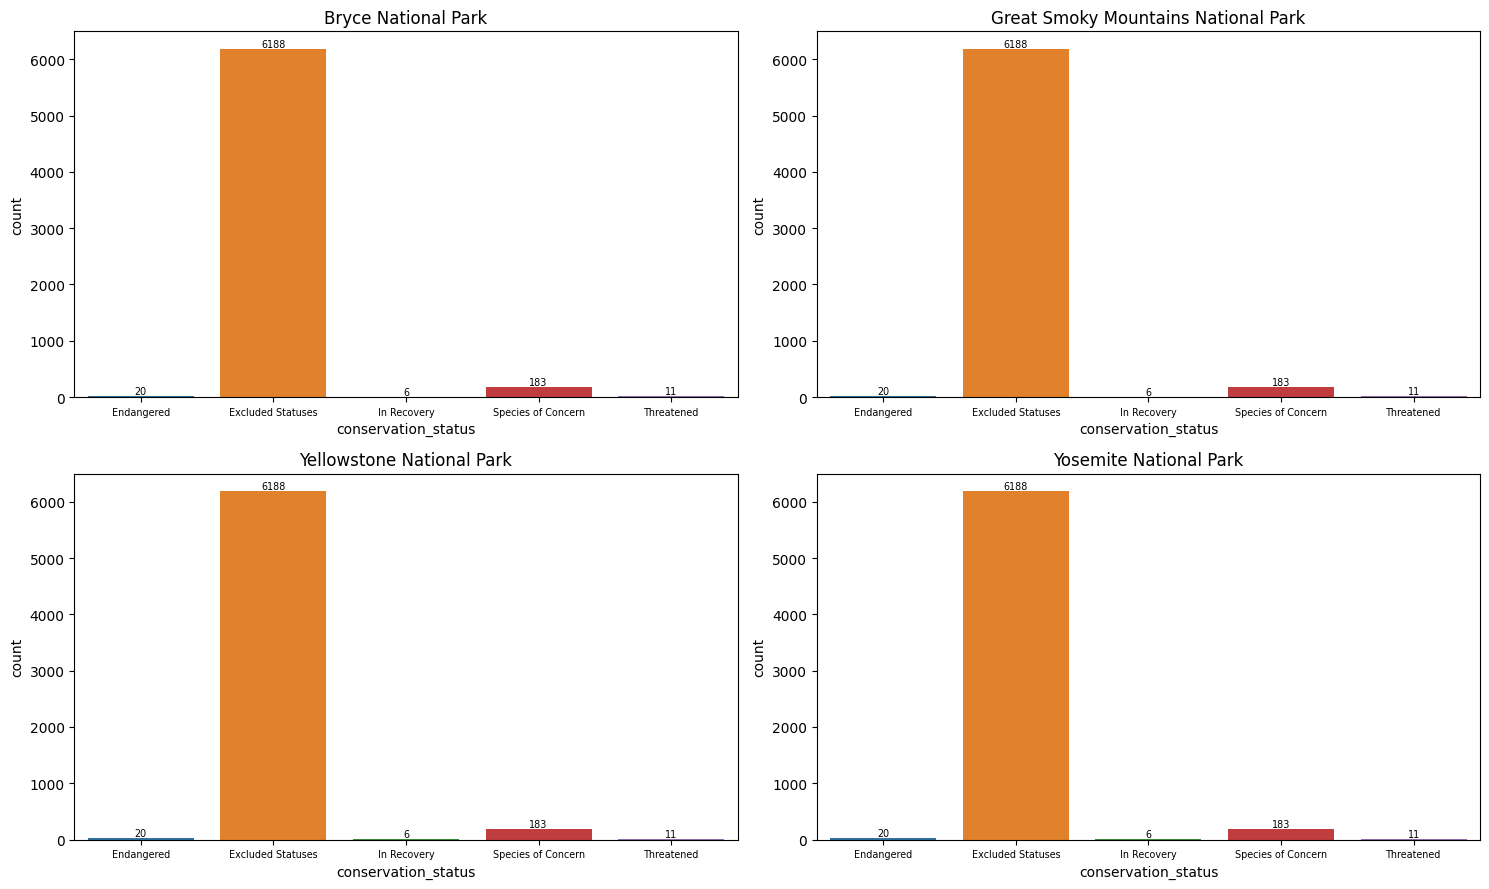

<Figure size 640x480 with 0 Axes>

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns


grouped_data = merged_df.groupby(["park_name", "conservation_status"]).size().reset_index(name="count")

park_names = grouped_data["park_name"].unique()

plt.figure(figsize=(15, 9))
for i, park_name in enumerate(park_names, 1):
    plt.subplot(2, 2, i)
    
    park_data = grouped_data[grouped_data["park_name"] == park_name]
    
    if not park_data.empty:
        sns.barplot(x="conservation_status", y="count", data=park_data)
        plt.title(park_name)
        plt.xticks(fontsize="x-small")

        ax = plt.gca()
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize='x-small')

plt.tight_layout()    
plt.savefig("Conservation Status by Park Name.jpg")
plt.show()
plt.clf()

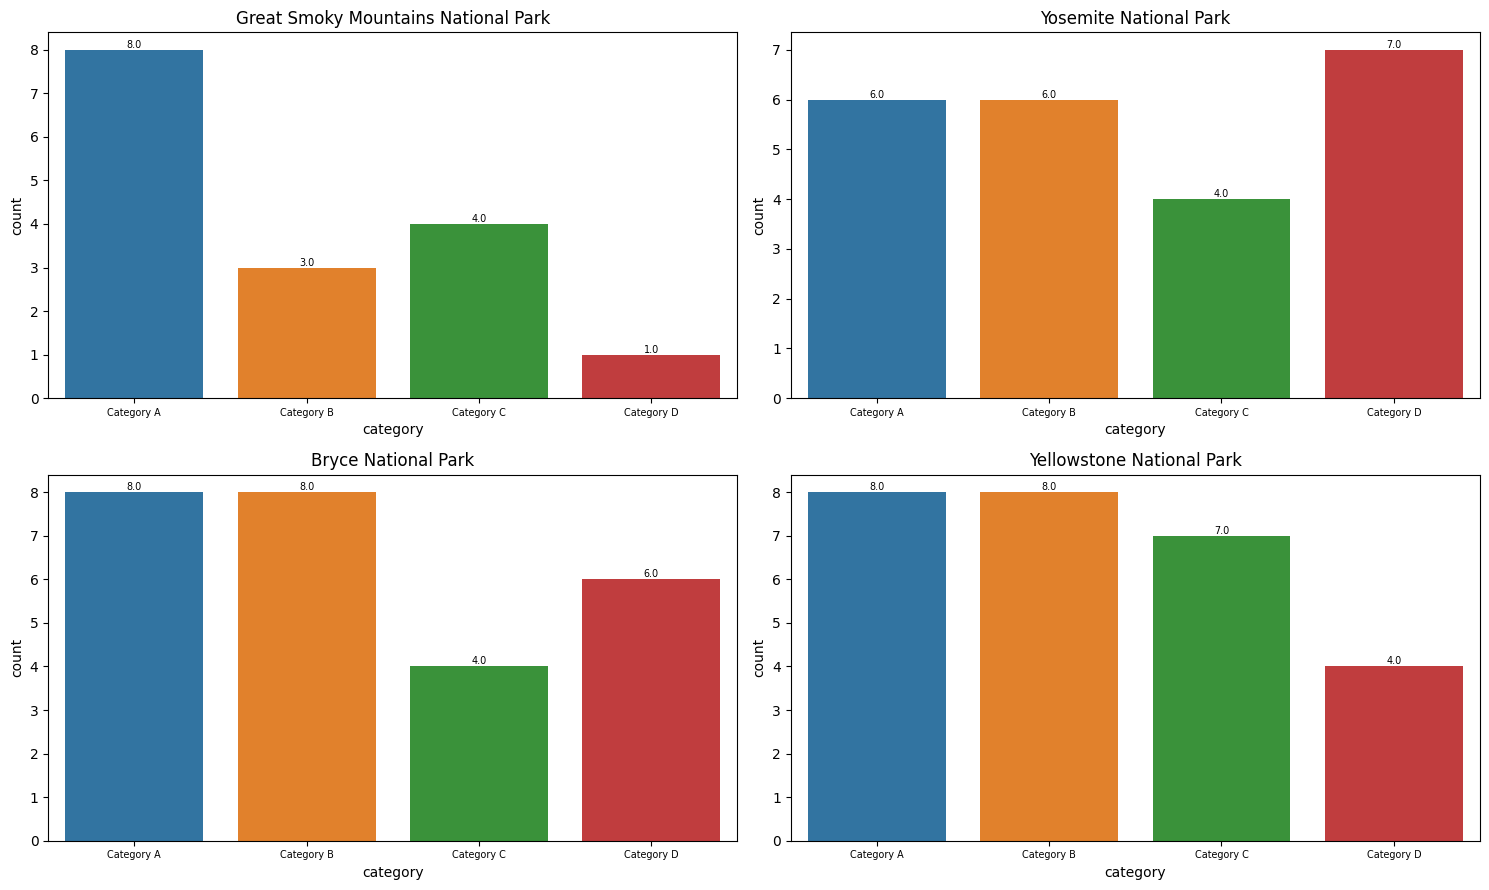

<Figure size 640x480 with 0 Axes>

In [79]:
park_names = ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']
categories = ['Category A', 'Category B', 'Category C', 'Category D']

data = []
for park_name in park_names:
    for category in categories:
        count = np.random.randint(1, 10)
        data.append({'park_name': park_name, 'category': category, 'count': count})

test_df = pd.DataFrame(data)

plt.figure(figsize=(15, 9))

for i, park_name in enumerate(park_names, 1):
    plt.subplot(2, 2, i)
    
    sns.barplot(x="category", y="count", data=test_df[test_df["park_name"] == park_name])
    plt.title(park_name)
    plt.xticks(fontsize="x-small")

    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize='x-small')

plt.tight_layout()    
plt.savefig("test.jpg")
plt.show()
plt.clf()

In [80]:
groups = merged_df.groupby('park_name')['category'].count()

print(groups)

sorted_df = merged_df.sort_values(by='category')
groups = sorted_df.groupby('park_name')

for key, group in groups:
    count = len(group)
    print(f"Group '{key}': Count = {count}")

park_name
Bryce National Park                    6408
Great Smoky Mountains National Park    6408
Yellowstone National Park              6408
Yosemite National Park                 6408
Name: category, dtype: int64
Group 'Bryce National Park': Count = 6408
Group 'Great Smoky Mountains National Park': Count = 6408
Group 'Yellowstone National Park': Count = 6408
Group 'Yosemite National Park': Count = 6408
